<a href="https://colab.research.google.com/github/decibone/PraktikumMLB1/blob/main/Tugas2_Laurentius_Lucky_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Laurentius Lucky Andriawan Bagaskara

NIM: 24060122130100

Nama Dataset: Wine Dataset

Link Dataset: https://archive.ics.uci.edu/dataset/109/wine

Tugas:
1. Lakukan clustering menggunakan dataset masing-masing (2 fitur atau lebih). Gunakan elbow method untuk menentukan nilai k optimal.
2. ⁠Lakukan evaluasi hasil clustering menggunakan inertia dan silhouette coefficient


K-Means Clustering

In [ ]:
import pandas

In [ ]:
## Load dataset
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['class', 'Alcohol',  'Malicacid',  'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

data = pandas.read_csv(url, names=names)

In [ ]:
print(data.head(10))

   class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   
5      1    14.20       1.76  2.45               15.2        112   
6      1    14.39       1.87  2.45               14.6         96   
7      1    14.06       2.15  2.61               17.6        121   
8      1    14.83       1.64  2.17               14.0         97   
9      1    13.86       1.35  2.27               16.0         98   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24          

Feature yang dipakai dalam clustering adalah Alcohol dan Maliacid.

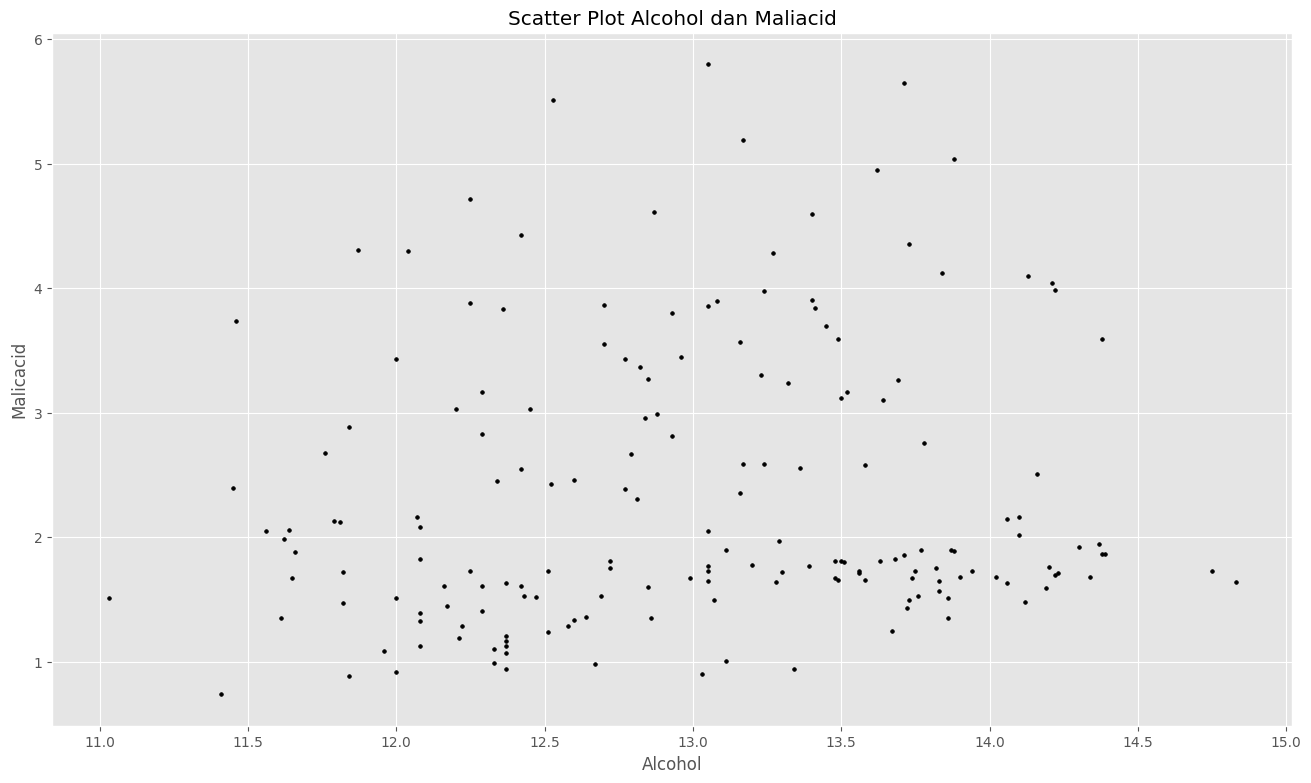

In [ ]:
# Plot dataset

f1 = data['Alcohol'].values
f2 = data['Malicacid'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Alcohol') # Adding label for x-axis
plt.ylabel('Malicacid') # Adding label for y-axis
plt.title('Scatter Plot Alcohol dan Maliacid') # Adding title
plt.show()



Melakukan clustering, visualisasikan plot tadi kedalam beberapa cluster

In [ ]:
from sklearn.cluster import KMeans # Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting input data
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[12.21349206  1.6531746 ]
 [13.71538462  1.79969231]
 [13.0632      3.8948    ]]


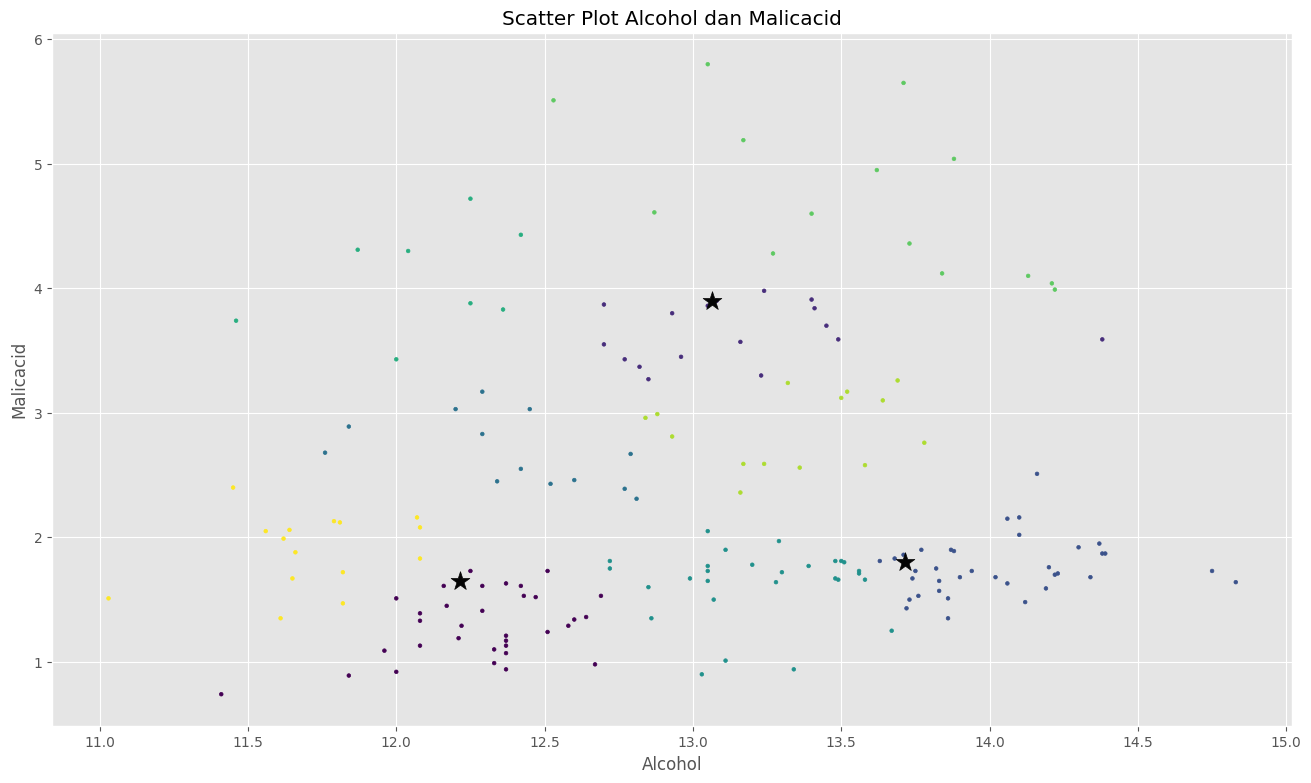

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=7, c=labels)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.title('Scatter Plot Alcohol dan Malicacid')
plt.show()


Dari scatterplot yang dibuat, dapat disimpulkan bahwa tidak ada hubungan linear yang dapat jelas terlihat antara alcohol dan maliacid. Hubungan antara keduanya lebih kompleks dan non-linear

Menemukan nilai-nilai k

In [ ]:
for k in range (1, 10):
  kmeans = KMeans(n_clusters=k, random_state=1) # Fitting input data
  kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
  labels = kmeans.predict(X)
# Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  inertia = kmeans.inertia_
  print("k:",k, " cost:", inertia)
  print ("")


k: 1  cost: 337.55275842696625

k: 2  cost: 168.08374191698118

k: 3  cost: 95.55394205616612

k: 4  cost: 72.97624808428719

k: 5  cost: 67.56820915750917

k: 6  cost: 55.773962159780574

k: 7  cost: 52.8473976332945

k: 8  cost: 40.78553483416097

k: 9  cost: 34.46089789809866



Elbow Method untuk mengetahui K optimal

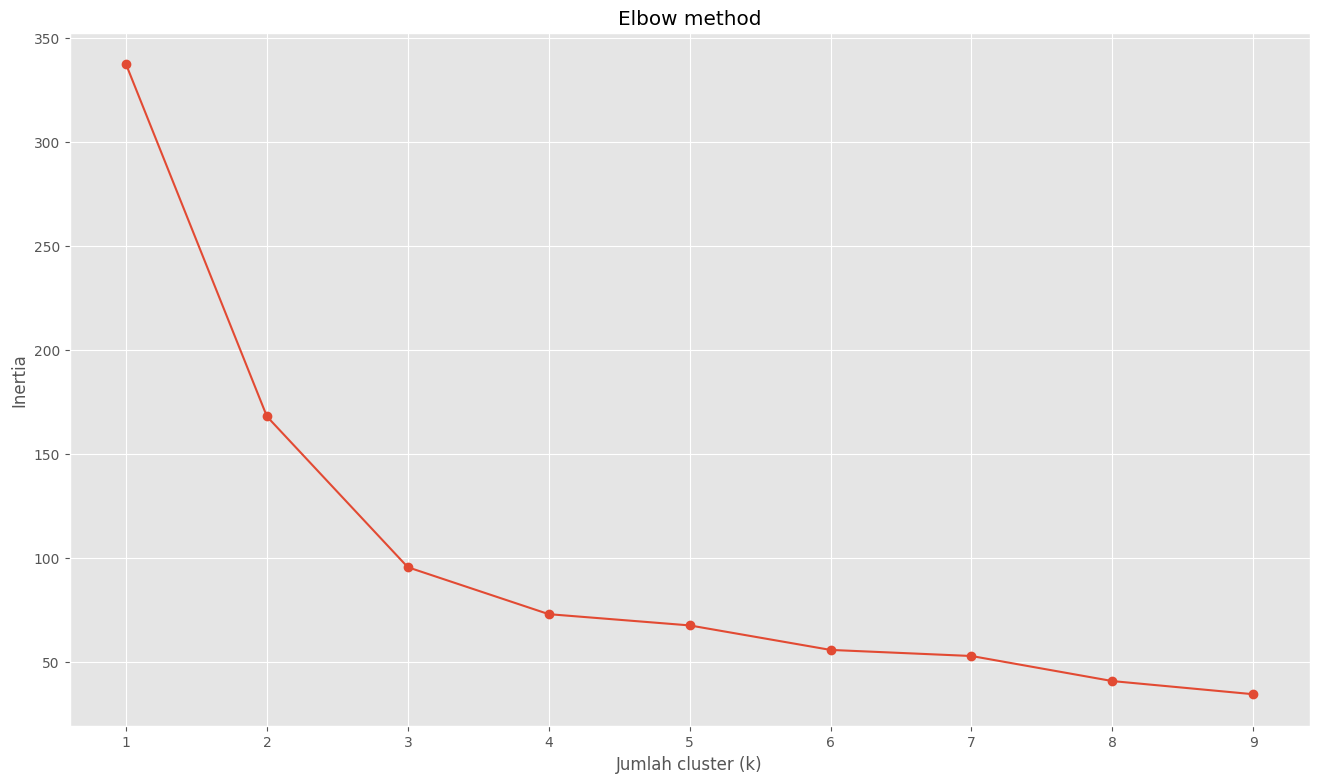

In [ ]:
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans = kmeans.fit(X)
    labels = kmeans.predict(X)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# Plot the elbow graph
plt.plot(range(1, 10), inertia_values, marker='o')
plt.title('Elbow method')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Inertia')
plt.show()

Dari Elbow graph yang didapat, dapat disimpulkan bahwa k optimal adalah k=3

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)


0.37695857405767913

Kesimpulanya dari silhouette score ini adalah, cluster-cluster tidak terlalu terdefinisi, dan banyak data point yang terletak dekat dengan boundary cluster.